# Practice

In [2]:
import numpy as np

In [7]:
x = np.zeros(9).reshape((3,3))
y = np.ones(6).reshape((2,3))

print(x)
print(y)

np.concatenate([x,y],axis=0)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
np.vstack((x,y))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [9]:
import pandas as pd
arr = pd.read_csv("./data/TIV-Export-USA-1950-2019.csv", header=None).values


In [10]:
arr

array([['country', 1950.0, 1951.0, ..., 2018.0, 2019.0, 'Total'],
       ['Afghanistan', nan, nan, ..., 331.0, 377.0, '2913'],
       ['African Union**', nan, nan, ..., nan, nan, '2'],
       ...,
       ['Zimbabwe', nan, nan, ..., nan, nan, '1'],
       [nan, nan, nan, ..., nan, nan, nan],
       ['Total', 1429.0, 4052.0, ..., 10414.0, 10752.0, '692123']],
      dtype=object)

In [16]:
# How do you access the data so that we can access the first row - year? 
year = arr[0,1:-1]
year



array([1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0,
       1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0,
       1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0,
       1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0,
       1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
       1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,
       1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0,
       2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
       2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0], dtype=object)

In [24]:
# How do you get the first column so that we can save all country names?
countries = arr[1:-2,0]
countries

idxToCountries = {countries[i]:i for i in range(len(countries))}
idxToCountries

# How to select the record for Indonesia?

# How to find out the country that imported most weapon from America all these years?

# How to find the year that America exported most weapon?

{'Afghanistan': 0,
 'African Union**': 1,
 'Albania': 2,
 'Algeria': 3,
 'Angola': 4,
 'Anti-Castro rebels (Cuba)*': 5,
 'Argentina': 6,
 'Armas (Guatemala)*': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belgium': 15,
 'Belize': 16,
 'Benin': 17,
 'Biafra': 18,
 'Bolivia': 19,
 'Bosnia-Herzegovina': 20,
 'Botswana': 21,
 'Brazil': 22,
 'Brunei': 23,
 'Bulgaria': 24,
 'Burkina Faso': 25,
 'Burundi': 26,
 'Cambodia': 27,
 'Cameroon': 28,
 'Canada': 29,
 'Central African Republic': 30,
 'Chad': 31,
 'Chile': 32,
 'China': 33,
 'Colombia': 34,
 'Congo': 35,
 'Contras (Nicaragua)*': 36,
 'Costa Rica': 37,
 "Cote d'Ivoire": 38,
 'Croatia': 39,
 'Cuba': 40,
 'Cyprus': 41,
 'Czechia': 42,
 'Denmark': 43,
 'Djibouti': 44,
 'Dominican Republic': 45,
 'DR Congo': 46,
 'Ecuador': 47,
 'Egypt': 48,
 'El Salvador': 49,
 'Equatorial Guinea': 50,
 'Estonia': 51,
 'Ethiopia': 52,
 'Fiji': 53,
 'Finland': 54,
 'France': 55,


In [25]:
arr

array([['country', 1950.0, 1951.0, ..., 2018.0, 2019.0, 'Total'],
       ['Afghanistan', nan, nan, ..., 331.0, 377.0, '2913'],
       ['African Union**', nan, nan, ..., nan, nan, '2'],
       ...,
       ['Zimbabwe', nan, nan, ..., nan, nan, '1'],
       [nan, nan, nan, ..., nan, nan, nan],
       ['Total', 1429.0, 4052.0, ..., 10414.0, 10752.0, '692123']],
      dtype=object)

In [26]:
arr = arr[1:-1, 1:-1]

In [27]:
arr

array([[nan, nan, nan, ..., 251.0, 331.0, 377.0],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., 4.0, 1.0, 5.0],
       ...,
       [nan, nan, nan, ..., nan, nan, 6.0],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [29]:
IndonesiaIdx = idxToCountries['Indonesia']
IndonesiaIdx

69

In [31]:
arr[idxToCountries['Indonesia'], :]

array([0.0, 0.0, 0.0, 6.0, 0.0, 1.0, nan, 14.0, 59.0, nan, 179.0, 184.0,
       15.0, 3.0, 2.0, 1.0, 7.0, 1.0, 1.0, 1.0, 20.0, 86.0, 5.0, 46.0,
       71.0, nan, 82.0, 50.0, 85.0, 56.0, 315.0, 87.0, 187.0, 122.0, 24.0,
       11.0, 22.0, 0.0, 60.0, 64.0, 188.0, 2.0, nan, 4.0, 4.0, 4.0, 19.0,
       23.0, 8.0, 24.0, 4.0, 4.0, 4.0, 8.0, 4.0, 4.0, 11.0, 17.0, 14.0,
       nan, nan, 0.0, 35.0, 85.0, 150.0, 82.0, 94.0, 246.0, 90.0, 2.0],
      dtype=object)

# Slowness of Loops

In [33]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
print(values)       
values = np.random.randint(1, 10, size=5)
print(compute_reciprocals(values))

[6 1 4 4 8]
[0.16666667 1.         0.25       0.25       0.125     ]


In [34]:
big_array = np.random.randint(1,100, size=1000000)
%timeit compute_reciprocals(big_array)

4.2 s ± 423 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This seems really SLOW!!! Most of times are wasted doing type checks... What if we have something that are all of fixed type??

In [35]:
print("Compute reciprocals using List and for loop: " ,compute_reciprocals(values))
print("Compute reciprocals using universal function: ", 1.0 / values)

Compute reciprocals using List and for loop:  [0.16666667 1.         0.25       0.25       0.125     ]
Compute reciprocals using universal function:  [0.16666667 1.         0.25       0.25       0.125     ]


In [36]:
%timeit (1.0 / big_array)

6.23 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


And it is very flexible, we can try to operate between two arrays:

In [37]:
np.arange(5) / np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In 2-d array as well:

In [38]:
x = np.arange(9).reshape((3,3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

# Explore NumPy's UFuncs

## Array arithmetic

In [39]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


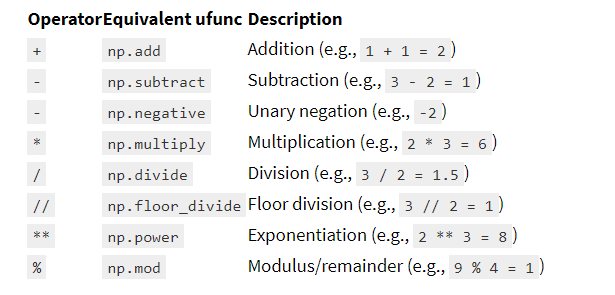

## Absolute value

In [40]:
x = np.array([-2, -1, 0, 1, 2])
np.abs(x)

array([2, 1, 0, 1, 2])

## Trig Functions

In [42]:
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [43]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


**Practice:** Get the value of cosine and sine at 0, $\pi/2$, $\pi$, $3 \pi / 2$, $2\pi$ using universal function and `linspace`

In [47]:
x = np.linspace(0,2 * np.pi, 5)
x

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

**Practice:** Plotting the graph of cos and sin

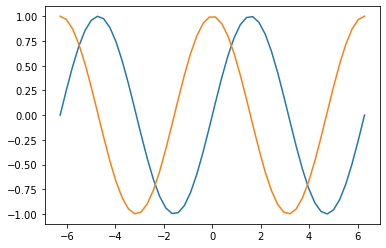

In [54]:
import matplotlib.pyplot as plt
# partition [-2pi, 2pi] into 1000 parts
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

# calculate its sine and cosine value
sinVal = np.sin(x)
cosVal = np.cos(x)

plt.plot(x,sinVal)
plt.plot(x,cosVal)

## Exponentials and Logarithms

In [55]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [56]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


**Practice:** Using numpy array and universal function, find out the first integer whose square root is bigger than 21.35

## Aggregates

For each universal function, we have the capability to call `reduce` and `accumulate` and `outer`. 

`Reduce` method repeated applies a give noperation to the elements of an array until only a single result remains

In [64]:
x = np.arange(1,6)
print(x)
np.add.reduce(x)

[1 2 3 4 5]


15

`accumulate` store all the intermediate results of the computation

In [66]:
print(x)
np.add.accumulate(x)

[1 2 3 4 5]


array([ 1,  3,  6, 10, 15], dtype=int32)

In [67]:
np.multiply.reduce(x)

120

In [68]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

In [ ]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

## Outer Product

`outer` allows you to compute output of all pairs of two inputs

In [69]:
x = np.arange(1,6)
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])